## Task-1

Load the dataset into a Pandas DataFrame. 
  Use basic inspection techniques: 
o  df.head() to view the first few rows. 
o  df.describe() to get statistical summaries. 
o  df.info() to check for missing values and data types. 
  Check the distribution of the target variable (Target).

In [2]:
import pandas as pd
df = pd.read_csv(r'heart.txt')

In [4]:

df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [5]:

df.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


 Target: Whether the patient has heart disease (1 = yes, 0 = no). 

In [5]:

df['AHD'].value_counts()

AHD
No     164
Yes    139
Name: count, dtype: int64

## Task-2

Task 2: Data Cleaning and Preprocessing (25-30 minutes) 
  Handle Missing Data: 
o  Check for missing values (df.isnull().sum()). 
o  If any columns have missing values, discuss strategies for handling them 
(e.g., filling with mean/median, or dropping rows). 
  Feature Engineering: 
o  Convert categorical variables like Sex, ChestPainType, RestingECG, etc., 
into numeric format using encoding (e.g., one-hot encoding or label 
encoding). 
o  Normalize or standardize numerical columns if necessary (e.g., 
RestingBP, Cholesterol, MaxHR). 
  Create New Features: 
o  Example: Combine Oldpeak and Slope to create a new feature that 
represents "exercise-induced heart stress".

Check for missing values (df.isnull().sum()).

In [6]:

df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

If any columns have missing values, discuss strategies for handling them 
(e.g., filling with mean/median, or dropping rows). 

In [18]:

df['Ca'] = df['Ca'].fillna(df['Ca'].median())   
df['Thal'] = df['Thal'].fillna(df['Thal'].mode()[0])

 Combine Oldpeak and Slope to create a new feature that 
represents "exercise-induced heart stress"

In [19]:

df['stress_index'] = df['Oldpeak'] * df['Slope']

In [20]:

df = pd.get_dummies(df, columns=['ChestPain','RestECG','Slope','Thal'], drop_first=True)

In [21]:
from sklearn.preprocessing import StandardScaler

# scale numeric columns
scaler = StandardScaler()
num_cols = ['Age','RestBP','Chol','MaxHR','Oldpeak','stress_index']
df[num_cols] = scaler.fit_transform(df[num_cols])

# check result
df.head()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,MaxHR,ExAng,Oldpeak,Ca,...,stress_index,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,RestECG_1,RestECG_2,Slope_2,Slope_3,Thal_normal,Thal_reversable
0,1,0.948726,1,0.757525,-0.264900,1,0.017197,0,1.087338,0.0,...,1.711909,0,0,1,0,1,0,1,0,0
1,2,1.392002,1,1.611220,0.760415,0,-1.821905,1,0.397182,3.0,...,0.327929,0,0,0,0,1,1,0,1,0
2,3,1.392002,1,-0.665300,-0.342283,0,-0.902354,1,1.346147,2.0,...,1.108636,0,0,0,0,1,1,0,0,1
3,4,-1.932564,1,-0.096170,0.063974,0,1.637359,0,2.122573,0.0,...,2.989428,1,0,0,0,0,0,1,1,0
4,5,-1.489288,0,-0.096170,-0.825922,0,0.980537,0,0.310912,0.0,...,-0.239857,0,1,0,0,1,0,0,1,0


## Task-3

Task 3: Exploratory Data Analysis (EDA) (30-40 minutes) 
  Univariate Analysis: 
o  Plot the distribution of key numerical features (e.g., Age, Cholesterol, 
MaxHR) using histograms or boxplots. 
o  Visualize the distribution of the target variable (Target), using a count plot. 
  Bivariate Analysis: 
o  Explore the relationship between the target variable (Target) and other 
features: 
  Use a count plot or bar plot for categorical features like Sex, 
ChestPainType, FBS, ExerciseAngina. 
  Use a boxplot or violin plot for numerical features like Age, 
Cholesterol, MaxHR to see how they relate to heart disease 
presence. 
  Correlation matrix to explore relationships between numeric 
features. 
  Visualizing correlations: 
o  Visualize correlations using a heatmap (sns.heatmap), focusing on 
relationships between features like cholesterol, age, and resting blood 
pressure. 

 Plot the distribution of key numerical features (e.g., Age, Cholesterol, 
MaxHR) using histograms or boxplots. 

In [22]:
import matplotlib.pyplot as plt

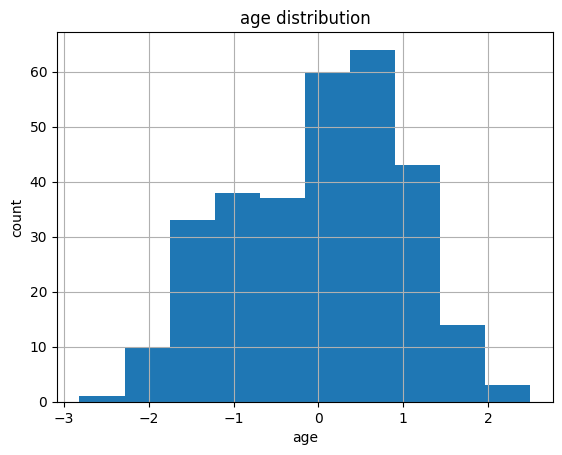

In [23]:

plt.figure()
df['Age'].hist()
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

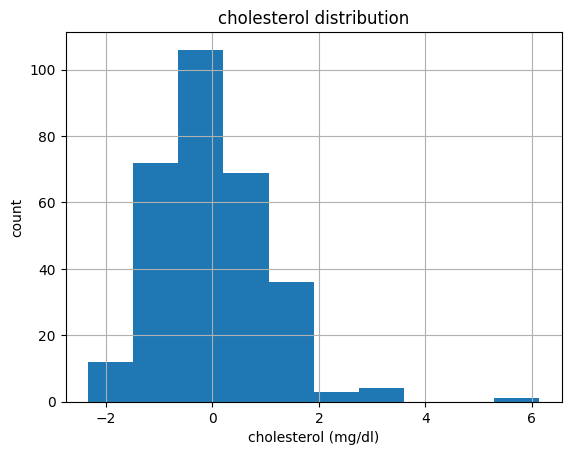

In [24]:

plt.figure()
df['Chol'].hist()
plt.title('cholesterol distribution')
plt.xlabel('cholesterol (mg/dl)')
plt.ylabel('count')
plt.show()

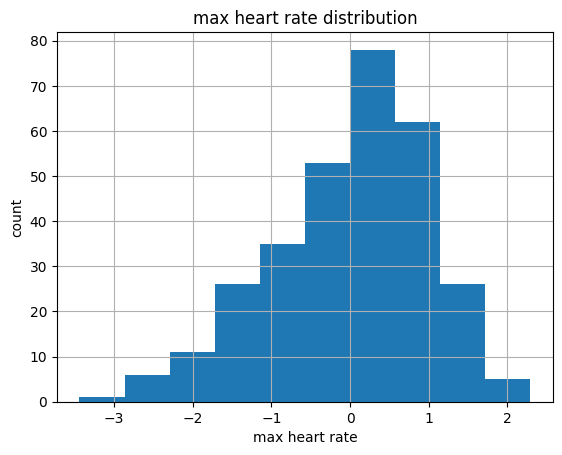

In [25]:
plt.figure()
df['MaxHR'].hist()
plt.title('max heart rate distribution')
plt.xlabel('max heart rate')
plt.ylabel('count')
plt.show()

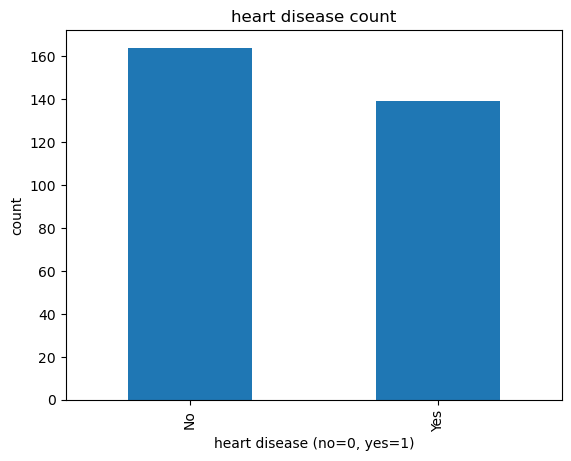

In [16]:

plt.figure()
df['AHD'].value_counts().plot(kind='bar')
plt.title('heart disease count')
plt.xlabel('heart disease (no=0, yes=1)')
plt.ylabel('count')
plt.show()

boxplot of age by heart disease

<Figure size 640x480 with 0 Axes>

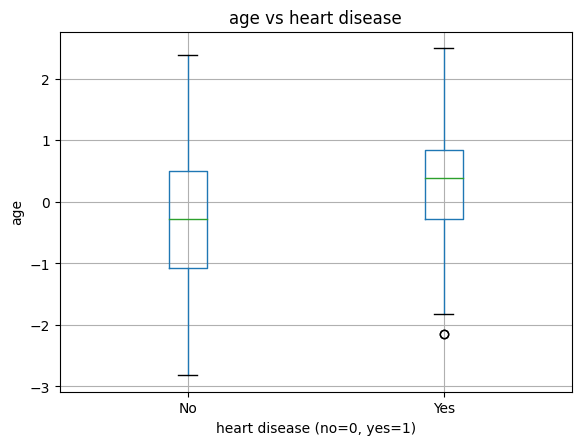

In [26]:

plt.figure()
df.boxplot(column='Age', by='AHD')
plt.title('age vs heart disease')
plt.suptitle('')
plt.xlabel('heart disease (no=0, yes=1)')
plt.ylabel('age')
plt.show()

correlation heatmap

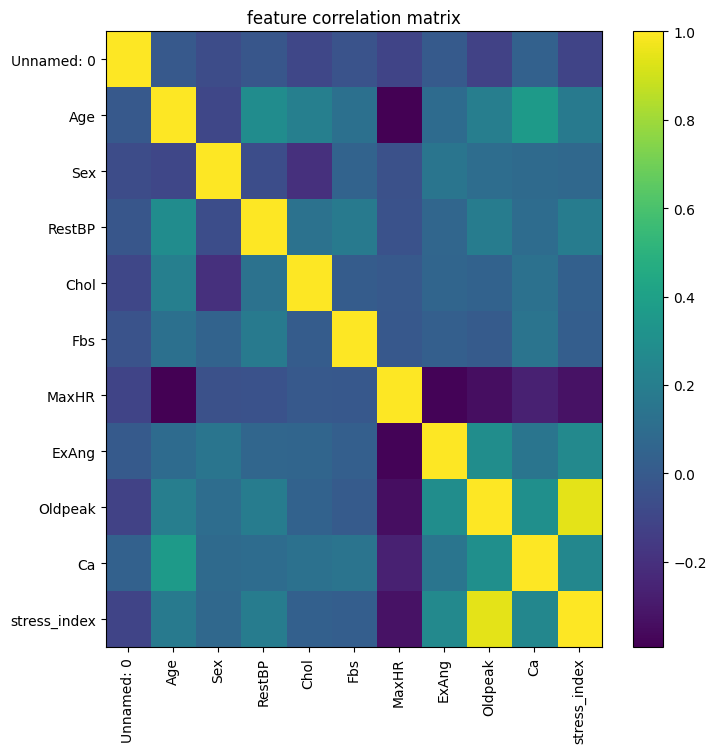

In [27]:

corr = df.select_dtypes(include=['int64','float64']).corr()
plt.figure(figsize=(8,8))
plt.imshow(corr, interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title('feature correlation matrix')
plt.show()

bar plot of disease rate by gender

<AxesSubplot:xlabel='Sex'>

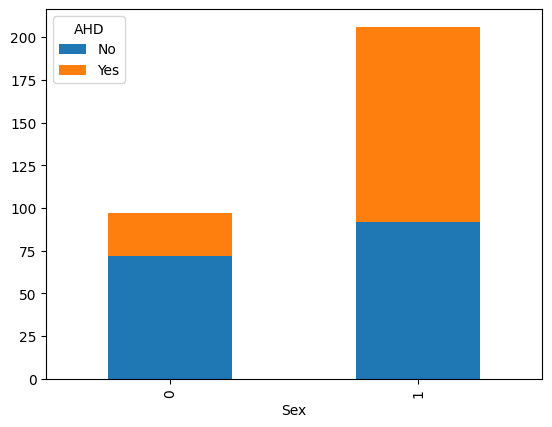

In [28]:

pd.crosstab(df['Sex'], df['AHD']).plot(kind='bar', stacked=True)

## Task-4

Task 4: Aggregation and Insights (20 minutes) 
  Use groupby to find the survival rate (presence of heart disease) by diƯerent 
categories: 
o  Survival by gender (Male vs Female). 
o  Survival by chest pain type (ChestPainType). 
o  Survival by maximum heart rate achieved (MaxHR). 
  Calculate average cholesterol levels for people with and without heart disease, 
and compare these across categories (e.g., ChestPainType). 


In [35]:
df['AHD_num'] = df['AHD'].map({'No': 0, 'Yes': 1})

Survival by gender (Male vs Female).

In [36]:
print('survival rate by gender:')
print(df.groupby('Sex')['AHD_num'].mean())

survival rate by gender:
Sex
0    0.257732
1    0.553398
Name: AHD_num, dtype: float64


survival rate by chest pain type

In [37]:

print('\nsurvival rate by chest pain type:')
print(df.groupby('ChestPain_typical')['AHD_num'].mean())


survival rate by chest pain type:
ChestPain_typical
0    0.471429
1    0.304348
Name: AHD_num, dtype: float64


 categorize max heart rate into low/high based on median

In [38]:

med_hr = df['MaxHR'].median()
df['hr_level'] = df['MaxHR'].apply(lambda x: 'low' if x < med_hr else 'high')
print('\nsurvival rate by maxhr level:')
print(df.groupby('hr_level')['AHD_num'].mean())


survival rate by maxhr level:
hr_level
high    0.282895
low     0.635762
Name: AHD_num, dtype: float64


average cholesterol by disease status

In [34]:

print('\navg cholesterol by disease:')
print(df.groupby('AHD')['Chol'].mean())


avg cholesterol by disease:
AHD
No    -0.078404
Yes    0.092506
Name: Chol, dtype: float64


average cholesterol by chest pain & disease status

In [39]:

print('\navg chol by chest pain & disease:')
print(df.groupby(['ChestPain_typical','AHD'])['Chol'].mean().unstack())


avg chol by chest pain & disease:
AHD                      No       Yes
ChestPain_typical                    
0                 -0.051707  0.090208
1                 -0.325355  0.135829


## Task-5

Task 5: Derive Medical Insights 
  Investigate the data set and come up with at least 5 diƯerent insights with proof 
  Prepare a dashboard for your findings 

In [30]:
df.head()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,MaxHR,ExAng,Oldpeak,Ca,...,stress_index,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,RestECG_1,RestECG_2,Slope_2,Slope_3,Thal_normal,Thal_reversable
0,1,0.948726,1,0.757525,-0.264900,1,0.017197,0,1.087338,0.0,...,1.711909,0,0,1,0,1,0,1,0,0
1,2,1.392002,1,1.611220,0.760415,0,-1.821905,1,0.397182,3.0,...,0.327929,0,0,0,0,1,1,0,1,0
2,3,1.392002,1,-0.665300,-0.342283,0,-0.902354,1,1.346147,2.0,...,1.108636,0,0,0,0,1,1,0,0,1
3,4,-1.932564,1,-0.096170,0.063974,0,1.637359,0,2.122573,0.0,...,2.989428,1,0,0,0,0,0,1,1,0
4,5,-1.489288,0,-0.096170,-0.825922,0,0.980537,0,0.310912,0.0,...,-0.239857,0,1,0,0,1,0,0,1,0


In [40]:
df.groupby('Sex')['AHD_num'].mean()

Sex
0    0.257732
1    0.553398
Name: AHD_num, dtype: float64

In [41]:
df.groupby('ChestPain_typical')['AHD_num'].mean()

ChestPain_typical
0    0.471429
1    0.304348
Name: AHD_num, dtype: float64

In [42]:
med_hr = df['MaxHR'].median()
df['hr_level'] = df['MaxHR'].apply(lambda x: 'low' if x<med_hr else 'high')
df.groupby('hr_level')['AHD_num'].mean()

hr_level
high    0.282895
low     0.635762
Name: AHD_num, dtype: float64

In [43]:
df.groupby('AHD')['Chol'].mean()


AHD
No    -0.078404
Yes    0.092506
Name: Chol, dtype: float64

<AxesSubplot:xlabel='ExAng'>

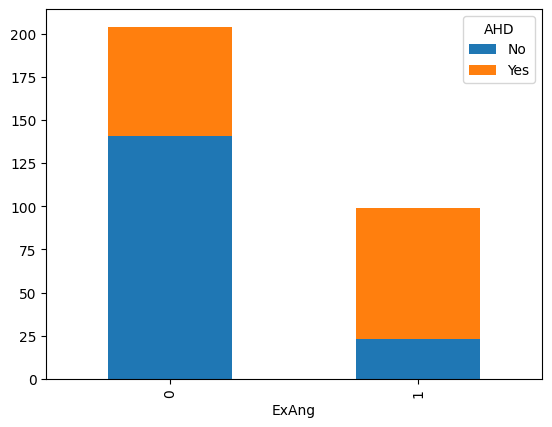

In [44]:
pd.crosstab(df['ExAng'], df['AHD']).plot(kind='bar', stacked=True)

In [45]:
# numeric target and hr level
df['AHD_num'] = df['AHD'].map({'No': 0, 'Yes': 1})
med_hr = df['MaxHR'].median()
df['hr_level'] = df['MaxHR'].apply(lambda x: 'low' if x < med_hr else 'high')

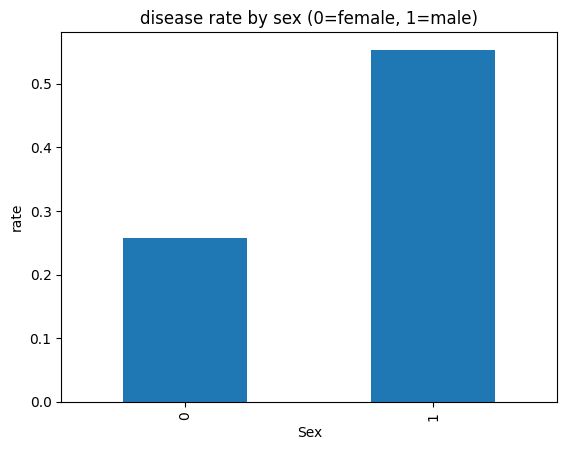

In [46]:
# chart 1: disease rate by sex
plt.figure()
df.groupby('Sex')['AHD_num'].mean().plot(kind='bar')
plt.title('disease rate by sex (0=female, 1=male)')
plt.ylabel('rate')
plt.show()

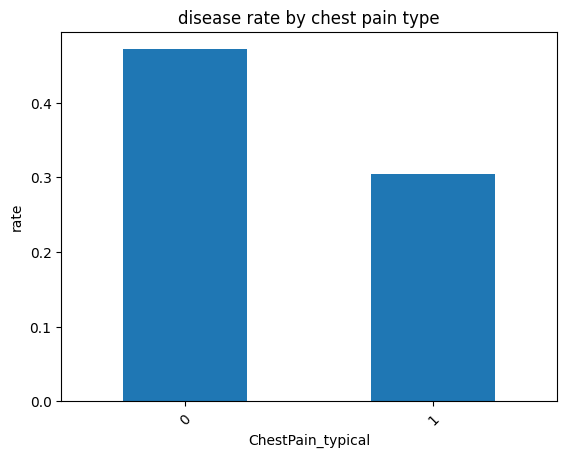

In [47]:
# chart 2: disease rate by chest pain
plt.figure()
df.groupby('ChestPain_typical')['AHD_num'].mean().plot(kind='bar')
plt.title('disease rate by chest pain type')
plt.ylabel('rate')
plt.xticks(rotation=45)
plt.show()

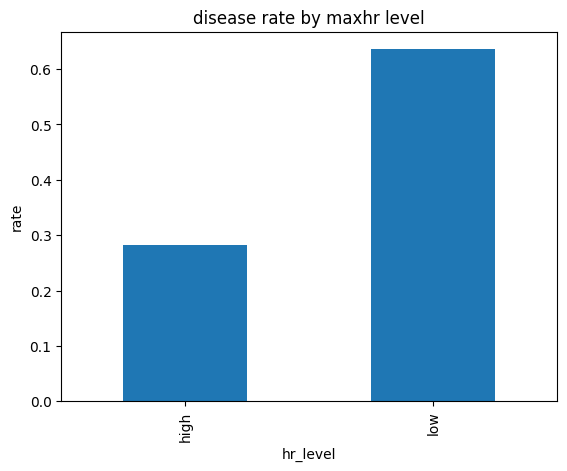

In [48]:
# chart 3: disease rate by maxhr level
plt.figure()
df.groupby('hr_level')['AHD_num'].mean().plot(kind='bar')
plt.title('disease rate by maxhr level')
plt.ylabel('rate')
plt.show()

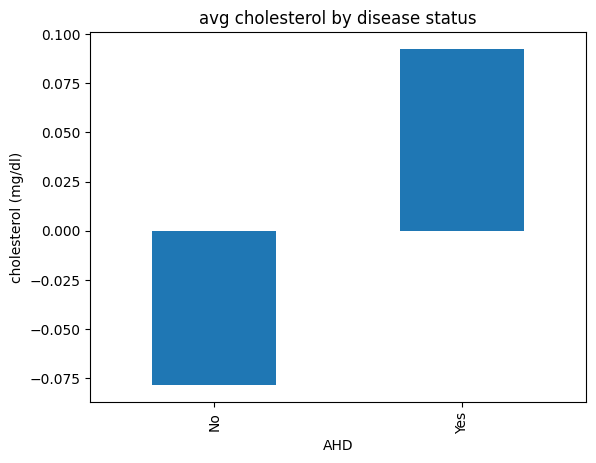

In [49]:
# chart 4: avg cholesterol by disease status
plt.figure()
df.groupby('AHD')['Chol'].mean().plot(kind='bar')
plt.title('avg cholesterol by disease status')
plt.ylabel('cholesterol (mg/dl)')
plt.show()

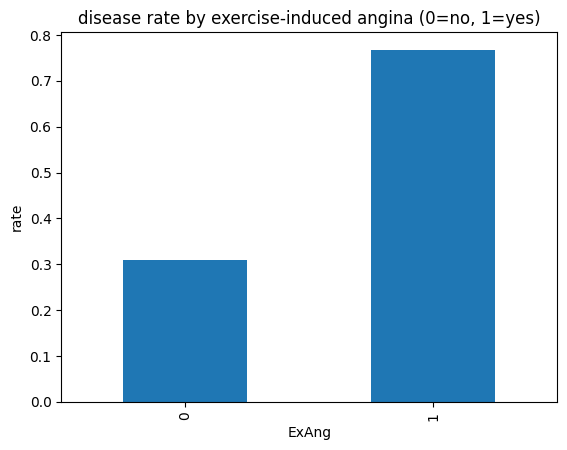

In [50]:
# chart 5: disease rate by exercise angina
plt.figure()
df.groupby('ExAng')['AHD_num'].mean().plot(kind='bar')
plt.title('disease rate by exercise-induced angina (0=no, 1=yes)')
plt.ylabel('rate')
plt.show()